## TI602 - Tópicos Inovadores em Computação

#### Trabalho Final - CNN com CIFAR-10

---

#### Nomes
*   Felipe Scherer Vicentin     - 18178
*   Gustavo Henrique de Meira   - 18015
*   Gustavo Miller Santos       - 18179
*   Pedro Henrique Marques Renó - 18177

*Trabalho desenvolvido utilizando Jupyter*.

### Atividades

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import utils, optimizers, regularizers, initializers
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.metrics import classification_report

import numpy as np

import matplotlib.pyplot as plt

1. Carregamento do dataset e separação dos dados de treinamento e validação. Todos os treinamentos intermediários devem ser avaliados neste conjunto de validação.

In [2]:
cifar10 = datasets.cifar10

# Carrega os dados, que já vem divididos em conjunto de treinamento e teste.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#x_ eh uma matriz de 32x32x3 (largura, altura, RGB)
#y_ eh um vetor de vetor com o id da classificacao

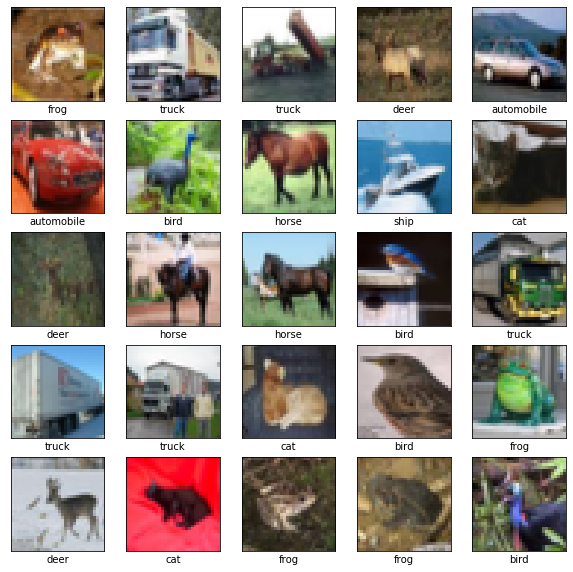

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [4]:
# Embaralha os dados e divide em 80% para treino, 20% para validação (pode utilizar outros percentuais)
nData = x_train.shape[0]  
nTrain = int(nData * 0.8)
randomIdx = np.random.permutation(np.arange(nData))
trainIdx = randomIdx[:nTrain] 
valIdx = randomIdx[nTrain:]

# Divide os dados
x_val, y_val = x_train[valIdx], y_train[valIdx]
x_train_fit, y_train_fit = x_train[trainIdx], y_train[trainIdx]

# Normalização dados entre [0, 1]
x_train_fit = np.asarray(x_train_fit, dtype = np.float64) / 255
x_val = np.asarray(x_val, dtype = np.float64) / 255
x_test = np.asarray(x_test, dtype = np.float64) / 255

2. Rede neural convolucional baseline. Sugestão: comece por uma arquitetura simples

In [5]:
def gera_modelo(camadas, optimizer='adam', batch_size=32, epochs=10):
    # Baseline
    model = Sequential(camadas)

    #model.summary()

    # Criando o modelo (pode alterar os parâmetros)
    model.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                   metrics=['accuracy'])

    # Fornecendo os dados de treino e retornando o history
    hist_object = model.fit(x_train_fit, y_train_fit, epochs = epochs, batch_size = batch_size, validation_data=(x_val, y_val))
    return hist_object, model

3. Explore ajustes, etc. (por exemplo o impacto de variar a quantidade de camadas de convolução e pooling, dropout, funções de ativação). Cuidado com overfitting!

In [6]:
historyList = []
legend = []
models = []

#Para cada modelo, podemos especificar os parametros
parametros = []

parametros.append({
                    'camadas': [
                                (Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))),
                                (MaxPooling2D((2, 2))),
                                (Conv2D(64, (3, 3), activation='relu')),
                                (MaxPooling2D((2, 2))),
                                (Conv2D(64, (3, 3), activation='relu')),
                                Flatten(), 
                                Dense(10, activation='softmax')
                              ]
                  }) # 65

parametros.append({
                    'camadas': [
                                (Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))),
                                (Conv2D(64, (3, 3), activation='relu')),
                                (MaxPooling2D((2, 2))),
                                (Conv2D(64, (3, 3), activation='relu')),
                                Flatten(), 
                                Dense(10, activation='softmax')
                              ]
                  }) # 70

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Conv2D(64, (3, 3), activation='relu'),
                                Flatten(),
                                Dense(10, activation='softmax')
                              ]
                  }) # 67


parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                Conv2D(64, (5, 5), activation='selu'),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (5, 5), activation='selu'),
                                Conv2D(32, (3, 3), activation='selu'),
                                Flatten(),
                                Dense(10, activation='softmax')
                              ]
                  }) # 9

parametros.append({
                    'camadas': [
                                Conv2D(6, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                AveragePooling2D(),
                                Conv2D(16, (3, 3), activation='relu'),
                                AveragePooling2D(),
                                Flatten(),
                                Dense(120, activation='relu'),
                                Dense(84, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 53

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Dropout(0.2),
                                Flatten(),
                                Dense(128, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 71

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Dropout(0.2),
                                MaxPooling2D((2, 2)),
                                Conv2D(32, (3, 3), activation='relu'),
                                Flatten(),
                                Dense(128, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 59


parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                #Dropout(0.2),
                                Conv2D(64, (3, 3), activation='relu'),
                                MaxPooling2D((2, 2)),
                                #Dropout(0.2),
                                Flatten(),
                                Dense(128, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 69

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                BatchNormalization(),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                BatchNormalization(),
                                Dropout(0.2),
                                Flatten(),
                                Dense(128, activation='relu'),
                                BatchNormalization(),
                                Dense(10, activation='softmax')
                              ]
                  }) # acc=83, val_acc=67, mas bem aleatorio

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                BatchNormalization(),
                                Dropout(0.2),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                BatchNormalization(),
                                Dropout(0.3),
                                Flatten(),
                                Dense(128, activation='relu'),
                                BatchNormalization(),
                                Dense(10, activation='softmax')
                              ]
                  }) # 80

#Para cada conjunto de camada, geraremos um modelo
for id_modelo, params in enumerate(parametros):
    print("Modelo " + str(id_modelo))
    print()
    
    hist_object, model = gera_modelo(**params)
    
    historyList.append(hist_object)
    legend.append("Modelo " + str(id_modelo))
    models.append(model)
    
    print()
    print("-------------------------------------------------")
    print()

W1126 11:31:08.908637  4180 deprecation.py:506] From c:\users\fsvic\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Modelo 0

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 18s 462us/sample - loss: 2.1015 - acc: 0.3519 - val_loss: 2.0216 - val_acc: 0.4346
Epoch 2/10
40000/40000 [==============================] - 18s 446us/sample - loss: 1.9895 - acc: 0.4693 - val_loss: 1.9539 - val_acc: 0.5036
Epoch 3/10
40000/40000 [==============================] - 18s 451us/sample - loss: 1.9425 - acc: 0.5161 - val_loss: 1.9445 - val_acc: 0.5130
Epoch 4/10
40000/40000 [==============================] - 19s 479us/sample - loss: 1.9077 - acc: 0.5521 - val_loss: 1.8977 - val_acc: 0.5600
Epoch 5/10
40000/40000 [==============================] - 18s 460us/sample - loss: 1.8849 - acc: 0.5746 - val_loss: 1.8997 - val_acc: 0.5609
Epoch 6/10
40000/40000 [==============================] - 18s 445us/sample - loss: 1.8686 - acc: 0.5915 - val_loss: 1.9046 - val_acc: 0.5536
Epoch 7/10
40000/40000 [==============================] - 18s 448us/sample - loss: 1.8496 - ac

W1126 11:57:20.544774  4180 deprecation.py:323] From c:\users\fsvic\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



-------------------------------------------------

Modelo 3

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 103s 3ms/sample - loss: 2.3575 - acc: 0.1025 - val_loss: 2.3611 - val_acc: 0.1000
Epoch 2/10
40000/40000 [==============================] - 105s 3ms/sample - loss: 2.3612 - acc: 0.1000 - val_loss: 2.3611 - val_acc: 0.1000
Epoch 3/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 2.3612 - acc: 0.1000 - val_loss: 2.3611 - val_acc: 0.1001
Epoch 4/10
40000/40000 [==============================] - 100s 3ms/sample - loss: 2.3612 - acc: 0.1000 - val_loss: 2.3611 - val_acc: 0.1001
Epoch 5/10
40000/40000 [==============================] - 101s 3ms/sample - loss: 2.3612 - acc: 0.1000 - val_loss: 2.3611 - val_acc: 0.1001
Epoch 6/10
40000/40000 [==============================] - 99s 2ms/sample - loss: 2.3612 - acc: 0.1000 - val_loss: 2.3611 - val_acc: 0.1001
Epoch 7/10
40000/40000 [==========================

40000/40000 [==============================] - 70s 2ms/sample - loss: 1.7512 - acc: 0.7144 - val_loss: 1.8257 - val_acc: 0.6337
Epoch 5/10
40000/40000 [==============================] - 71s 2ms/sample - loss: 1.7225 - acc: 0.7437 - val_loss: 1.8238 - val_acc: 0.6373
Epoch 6/10
40000/40000 [==============================] - 70s 2ms/sample - loss: 1.6952 - acc: 0.7714 - val_loss: 1.8512 - val_acc: 0.6068
Epoch 7/10
40000/40000 [==============================] - 70s 2ms/sample - loss: 1.6734 - acc: 0.7925 - val_loss: 1.7962 - val_acc: 0.6661
Epoch 8/10
40000/40000 [==============================] - 75s 2ms/sample - loss: 1.6512 - acc: 0.8152 - val_loss: 1.8027 - val_acc: 0.6592
Epoch 9/10
40000/40000 [==============================] - 76s 2ms/sample - loss: 1.6395 - acc: 0.8265 - val_loss: 1.8104 - val_acc: 0.6514
Epoch 10/10
40000/40000 [==============================] - 71s 2ms/sample - loss: 1.6269 - acc: 0.8388 - val_loss: 1.8335 - val_acc: 0.6251

------------------------------------

4. Plote os gráficos da função de loss x número de épocas, para o treino e validação de cada modelo testado/avaliado. Houve overfitting?

In [7]:
def plot_loss_accuracy(historyList, legend, plotSet="both"):
    linestyles = ['-', '--', ':', '-.']
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

    #Plot Loss
    for idx,hist in enumerate(historyList):
        if plotSet in ["train", "both"]:
            ax1.plot(hist.history['loss'], linestyle=linestyles[idx%len(linestyles)])
        elif 'val_loss' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax1.plot(hist.history['val_loss'], linestyle=linestyles[idx%len(linestyles)])
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    #Plot ACC
    for idx,hist in enumerate(historyList): 
        if plotSet in ["train", "both"]:
            ax2.plot(hist.history['acc'], linestyle=linestyles[idx%len(linestyles)])
        elif 'val_acc' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax2.plot(hist.history['val_acc'], linestyle=linestyles[idx%len(linestyles)])
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    
    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='center left')    
    plt.subplots_adjust(right=0.75)
    plt.show()

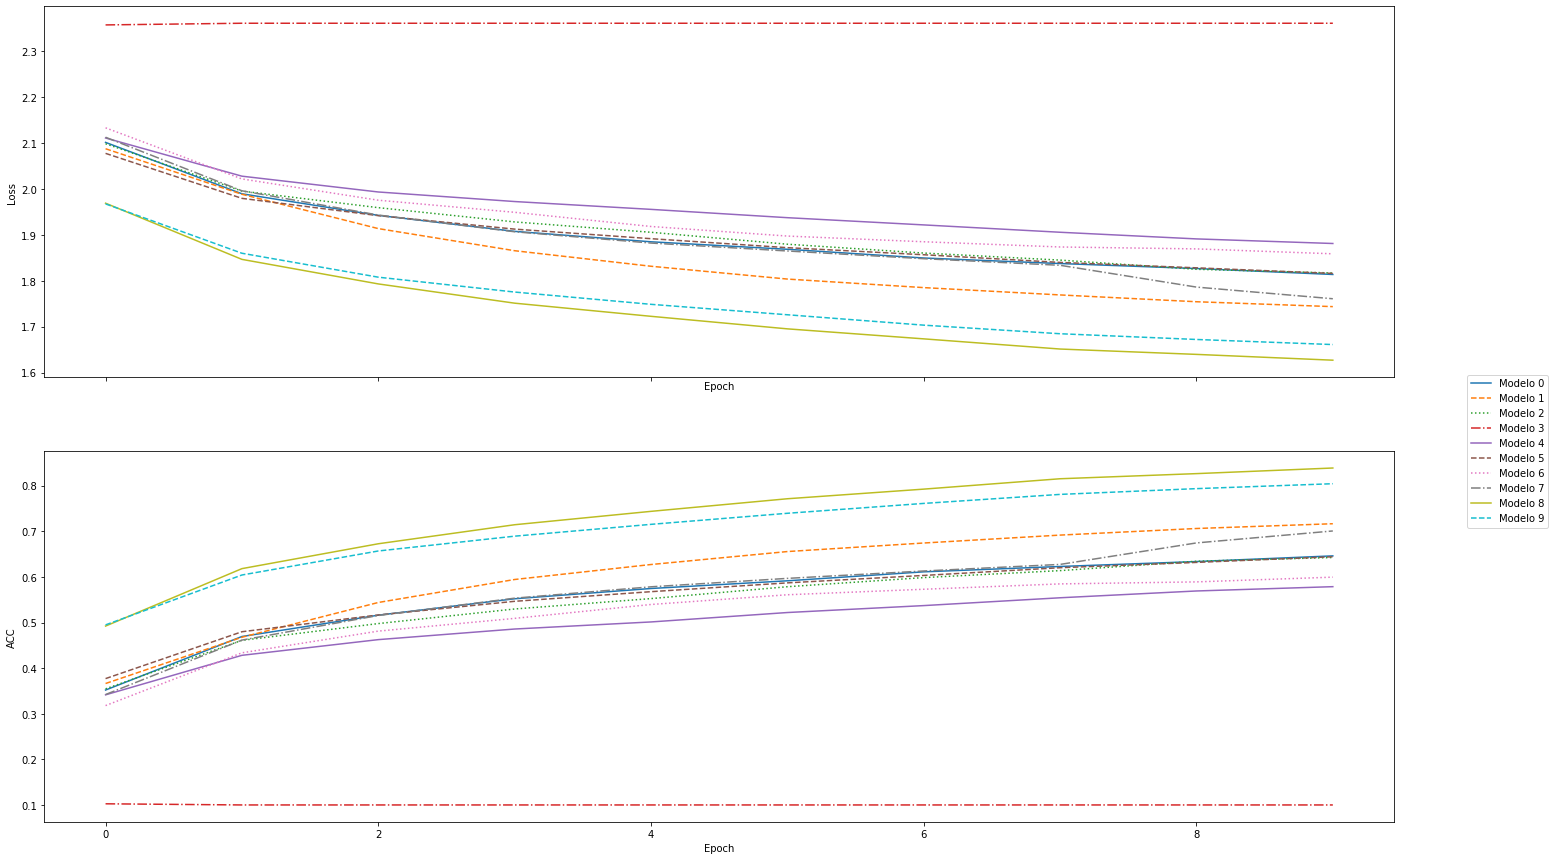

In [8]:
plt.rcParams['figure.figsize'] = (30,15) 
plot_loss_accuracy(historyList, legend, plotSet='both')

5. A partir dos experimentos acima, construa o que você considera o melhor modelo e faça a avaliação no conjunto de teste. Obs: Avaliação no conjunto de teste só pode ser executada uma única vez.

In [9]:
#Pegando o melhor modelo
modelo_final = models[8]

#Testando a precisao
predict = np.argmax(modelo_final.predict(x_test), axis = -1)

#Mostrando os resultados
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61      1000
           1       0.92      0.48      0.63      1000
           2       0.65      0.44      0.53      1000
           3       0.55      0.39      0.46      1000
           4       0.41      0.84      0.55      1000
           5       0.64      0.49      0.56      1000
           6       0.71      0.76      0.74      1000
           7       0.81      0.61      0.70      1000
           8       0.74      0.81      0.77      1000
           9       0.51      0.91      0.66      1000

    accuracy                           0.62     10000
   macro avg       0.68      0.62      0.62     10000
weighted avg       0.68      0.62      0.62     10000

